# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [75]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [76]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [77]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [78]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [79]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


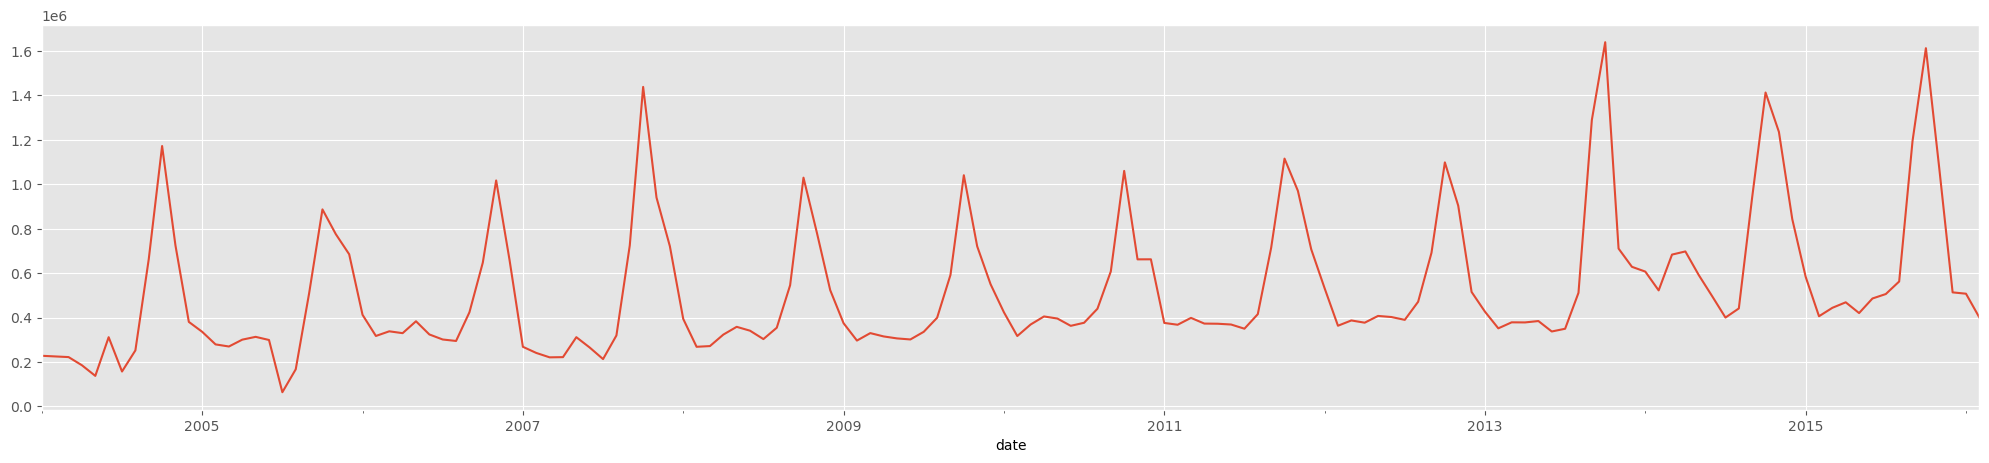

In [80]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [81]:
len_train = int(len(ts) * 0.85)
len_test = int(len(ts) * 0.15)

train_data = ts[:len_train]
test_data = ts[-len_test:]


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [82]:
# pip install statsmodels pmdarima

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\админ\AppData\Local\Temp\ipykernel_40580\3029021273.py:28: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_holt_additive_damped = ExponentialSmoothing(train_data, trend='add', seasonal=None, damped=True)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


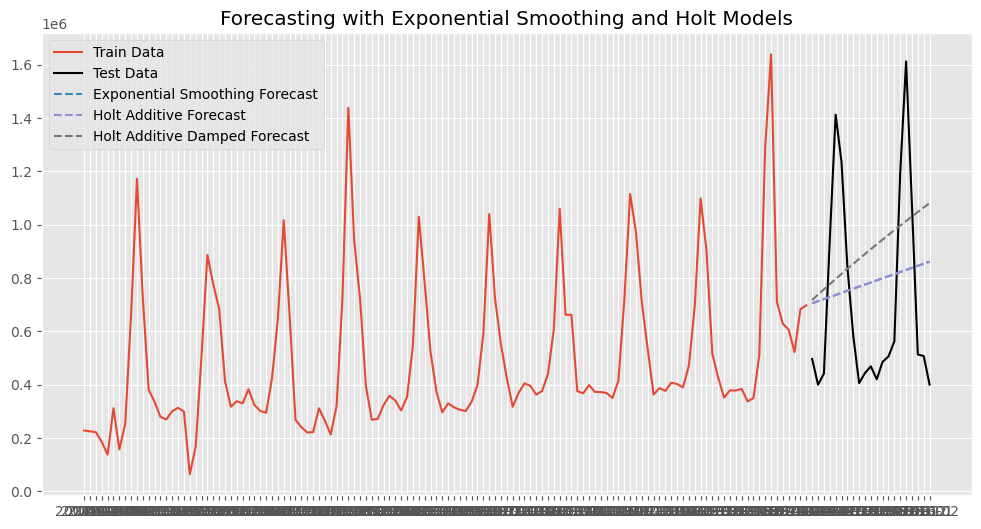

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

len_train = int(len(ts) * 0.85)
len_test = int(len(ts) * 0.15)

train_data = ts[:len_train]
test_data = ts[-len_test:]


# 1) Простое экспоненциальное сглаживание с автоматически подбираемым α
model_exp_smoothing = ExponentialSmoothing(train_data, trend='add', seasonal=None)
result_exp_smoothing = model_exp_smoothing.fit()

# Прогноз на 22 шага вперед
forecast_exp_smoothing = result_exp_smoothing.forecast(steps=len(test_data))

# 2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров
model_holt_additive = ExponentialSmoothing(train_data, trend='add', seasonal=None)
result_holt_additive = model_holt_additive.fit()

# Прогноз на 22 шага вперед
forecast_holt_additive = result_holt_additive.forecast(steps=len(test_data))

# 3) Аддитивная модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом
model_holt_additive_damped = ExponentialSmoothing(train_data, trend='add', seasonal=None, damped=True)
result_holt_additive_damped = model_holt_additive_damped.fit()

# Прогноз на 22 шага вперед
forecast_holt_additive_damped = result_holt_additive_damped.forecast(steps=len(test_data))

# Преобразование индекса PeriodIndex в строки
train_data.index = train_data.index.astype(str)
test_data.index = test_data.index.astype(str)

# Отрисовка прогнозов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['quantity'], label='Train Data')
plt.plot(test_data.index, test_data['quantity'], label='Test Data', color='black')
plt.plot(test_data.index, forecast_exp_smoothing, label='Exponential Smoothing Forecast', linestyle='--')
plt.plot(test_data.index, forecast_holt_additive, label='Holt Additive Forecast', linestyle='--')
plt.plot(test_data.index, forecast_holt_additive_damped, label='Holt Additive Damped Forecast', linestyle='--')
plt.legend()
plt.title('Forecasting with Exponential Smoothing and Holt Models')
plt.show()


## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Аддитивная модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [84]:
pip install sktime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\админ\AppData\Local\Temp\ipykernel_40580\561493195.py:27: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_additive_damped = ExponentialSmoothing(train_data['quantity'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\админ\AppData\Local\Temp\ipykernel_40580\561493195.py:32: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_additive_multiplicative_damped = Exponenti

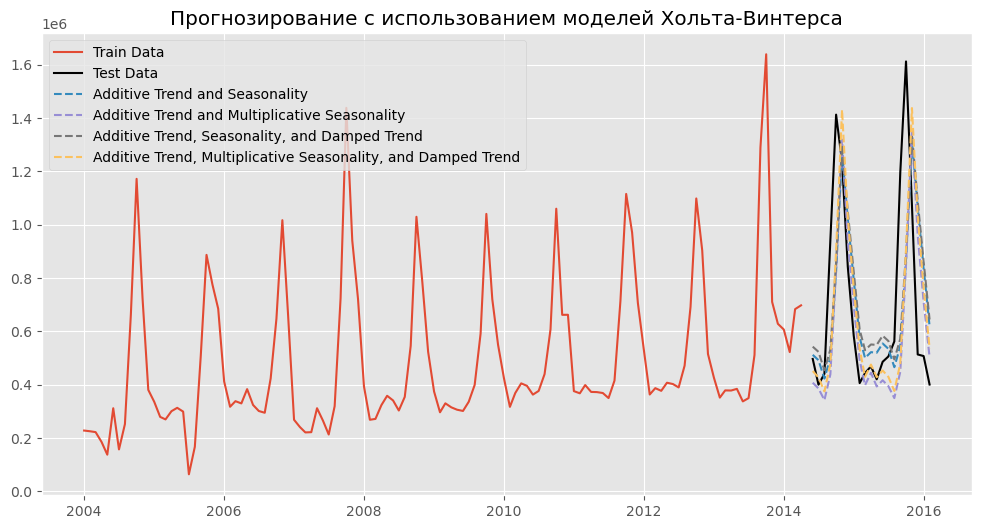

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Предположим, что ваш DataFrame называется ts и имеет столбец 'quantity'.
# Замените ts на ваш настоящий DataFrame и 'quantity' на ваш столбец с данными.

# Преобразуем индекс в формат временных меток
ts.index = pd.to_datetime(ts.index)

len_train = int(len(ts) * 0.85)
len_test = int(len(ts) * 0.15)

train_data = ts[:len_train]
test_data = ts[-len_test:]

# 1) Модель с аддитивными трендом и сезонностью
model_additive = ExponentialSmoothing(train_data['quantity'], trend='add', seasonal='add', seasonal_periods=12)
result_additive = model_additive.fit()
forecast_additive = result_additive.forecast(steps=len(test_data))

# 2) Модель с аддитивным трендом и мультипликативной сезонностью
model_additive_multiplicative = ExponentialSmoothing(train_data['quantity'], trend='add', seasonal='mul', seasonal_periods=12)
result_additive_multiplicative = model_additive_multiplicative.fit()
forecast_additive_multiplicative = result_additive_multiplicative.forecast(steps=len(test_data))

# 3) Модель с аддитивными трендом и сезонностью и затухающим трендом
model_additive_damped = ExponentialSmoothing(train_data['quantity'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
result_additive_damped = model_additive_damped.fit()
forecast_additive_damped = result_additive_damped.forecast(steps=len(test_data))

# 4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом
model_additive_multiplicative_damped = ExponentialSmoothing(train_data['quantity'], trend='add', seasonal='mul', seasonal_periods=12, damped=True)
result_additive_multiplicative_damped = model_additive_multiplicative_damped.fit()
forecast_additive_multiplicative_damped = result_additive_multiplicative_damped.forecast(steps=len(test_data))

# Отрисовка прогнозов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['quantity'], label='Train Data')
plt.plot(test_data.index, test_data['quantity'], label='Test Data', color='black')
plt.plot(test_data.index, forecast_additive, label='Additive Trend and Seasonality', linestyle='--')
plt.plot(test_data.index, forecast_additive_multiplicative, label='Additive Trend and Multiplicative Seasonality', linestyle='--')
plt.plot(test_data.index, forecast_additive_damped, label='Additive Trend, Seasonality, and Damped Trend', linestyle='--')
plt.plot(test_data.index, forecast_additive_multiplicative_damped, label='Additive Trend, Multiplicative Seasonality, and Damped Trend', linestyle='--')

plt.legend()
plt.title('Прогнозирование с использованием моделей Хольта-Винтерса')
plt.show()


Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [99]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1) Модель с аддитивными трендом и сезонностью
rmse_additive = np.sqrt(mean_squared_error(test_data['quantity'], forecast_additive))

# 2) Модель с аддитивным трендом и мультипликативной сезонностью
rmse_additive_multiplicative = np.sqrt(mean_squared_error(test_data['quantity'], forecast_additive_multiplicative))

# 3) Модель с аддитивными трендом и сезонностью и затухающим трендом
rmse_additive_damped = np.sqrt(mean_squared_error(test_data['quantity'], forecast_additive_damped))

# 4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом
rmse_additive_multiplicative_damped = np.sqrt(mean_squared_error(test_data['quantity'], forecast_additive_multiplicative_damped))

# Выводим результаты
print(f"RMSE (Additive): {rmse_additive}")
print(f"RMSE (Additive Multiplicative): {rmse_additive_multiplicative}")
print(f"RMSE (Additive Damped): {rmse_additive_damped}")
print(f"RMSE (Additive Multiplicative Damped): {rmse_additive_multiplicative_damped}")


RMSE (Additive): 322285.16871198197
RMSE (Additive Multiplicative): 322031.5011794945
RMSE (Additive Damped): 322081.24332507845
RMSE (Additive Multiplicative Damped): 319205.56323864695


## Quiz

Какая модель справилась лучше остальных?

**Ответ:** Additive Multiplicative Damped

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [100]:
# Применяем логарифм к правильным ответам и прогнозам
test_data_log = np.log1p(test_data['quantity'])
forecast_additive_log = np.log1p(forecast_additive)
forecast_additive_multiplicative_log = np.log1p(forecast_additive_multiplicative)
forecast_additive_damped_log = np.log1p(forecast_additive_damped)
forecast_additive_multiplicative_damped_log = np.log1p(forecast_additive_multiplicative_damped)

# Вычисляем RMSE для логарифмов
rmse_additive_log = np.sqrt(mean_squared_error(test_data_log, forecast_additive_log))
rmse_additive_multiplicative_log = np.sqrt(mean_squared_error(test_data_log, forecast_additive_multiplicative_log))
rmse_additive_damped_log = np.sqrt(mean_squared_error(test_data_log, forecast_additive_damped_log))
rmse_additive_multiplicative_damped_log = np.sqrt(mean_squared_error(test_data_log, forecast_additive_multiplicative_damped_log))

# Выводим результаты
print(f"RMSE (Additive) for Logarithms: {rmse_additive_log}")
print(f"RMSE (Additive Multiplicative) for Logarithms: {rmse_additive_multiplicative_log}")
print(f"RMSE (Additive Damped) for Logarithms: {rmse_additive_damped_log}")
print(f"RMSE (Additive Multiplicative Damped) for Logarithms: {rmse_additive_multiplicative_damped_log}")


RMSE (Additive) for Logarithms: 0.3861988848681712
RMSE (Additive Multiplicative) for Logarithms: 0.400423044668029
RMSE (Additive Damped) for Logarithms: 0.38986837301620086
RMSE (Additive Multiplicative Damped) for Logarithms: 0.3839239211931731


## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

**Ответ:** Хольта-Винтерса